## **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, RocCurveDisplay

from statistics import stdev

import warnings
warnings.filterwarnings("ignore")

# **Data Understanding**

In [2]:
data = pd.read_csv('../Data/diabetes_prediction_dataset.csv')

In [3]:
samples, features = data.shape
print('Jumlah sampel data\t: ', samples)
print('Jumlah fitur data\t: ', features)

Jumlah sampel data	:  100000
Jumlah fitur data	:  9


In [4]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


# **Data Exploration**

In [7]:
d = []
u = []
t = []
for col in data:
    d.append(col)
    u.append(data[col].nunique())
    t.append(data[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,gender,object,3
1,age,float64,102
2,hypertension,int64,2
3,heart_disease,int64,2
4,smoking_history,object,6
5,bmi,float64,4247
6,HbA1c_level,float64,18
7,blood_glucose_level,int64,18
8,diabetes,int64,2


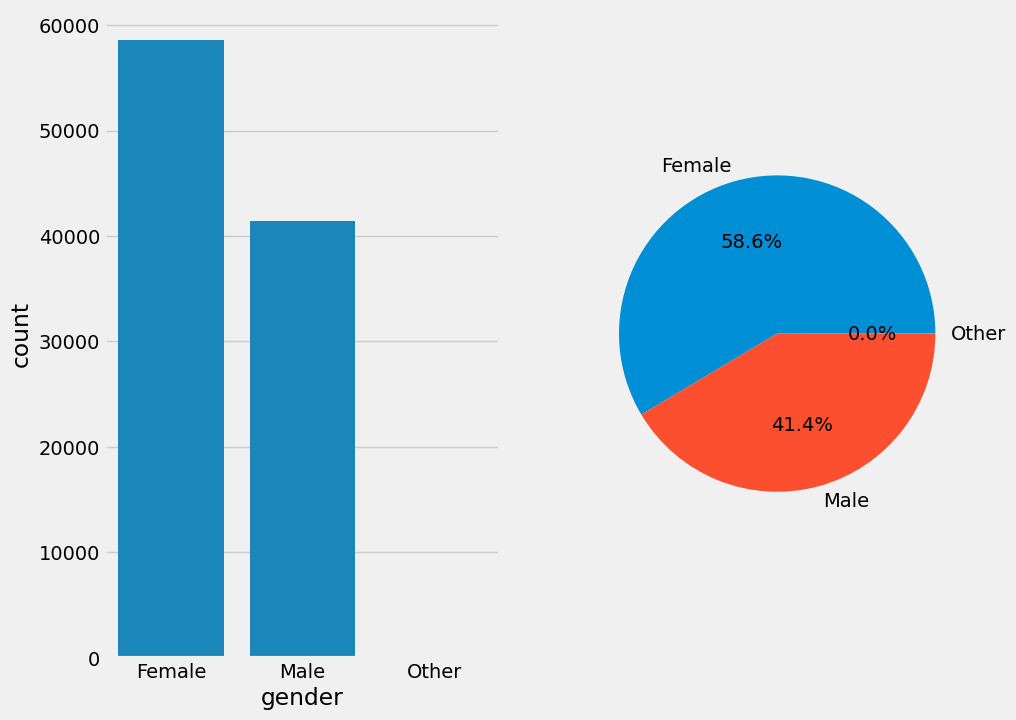

In [8]:
labels = ['Female', 'Male', 'Other']
values = data['gender'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.countplot(x=data['gender'], data=data)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.savefig('FirstImage')
plt.show()

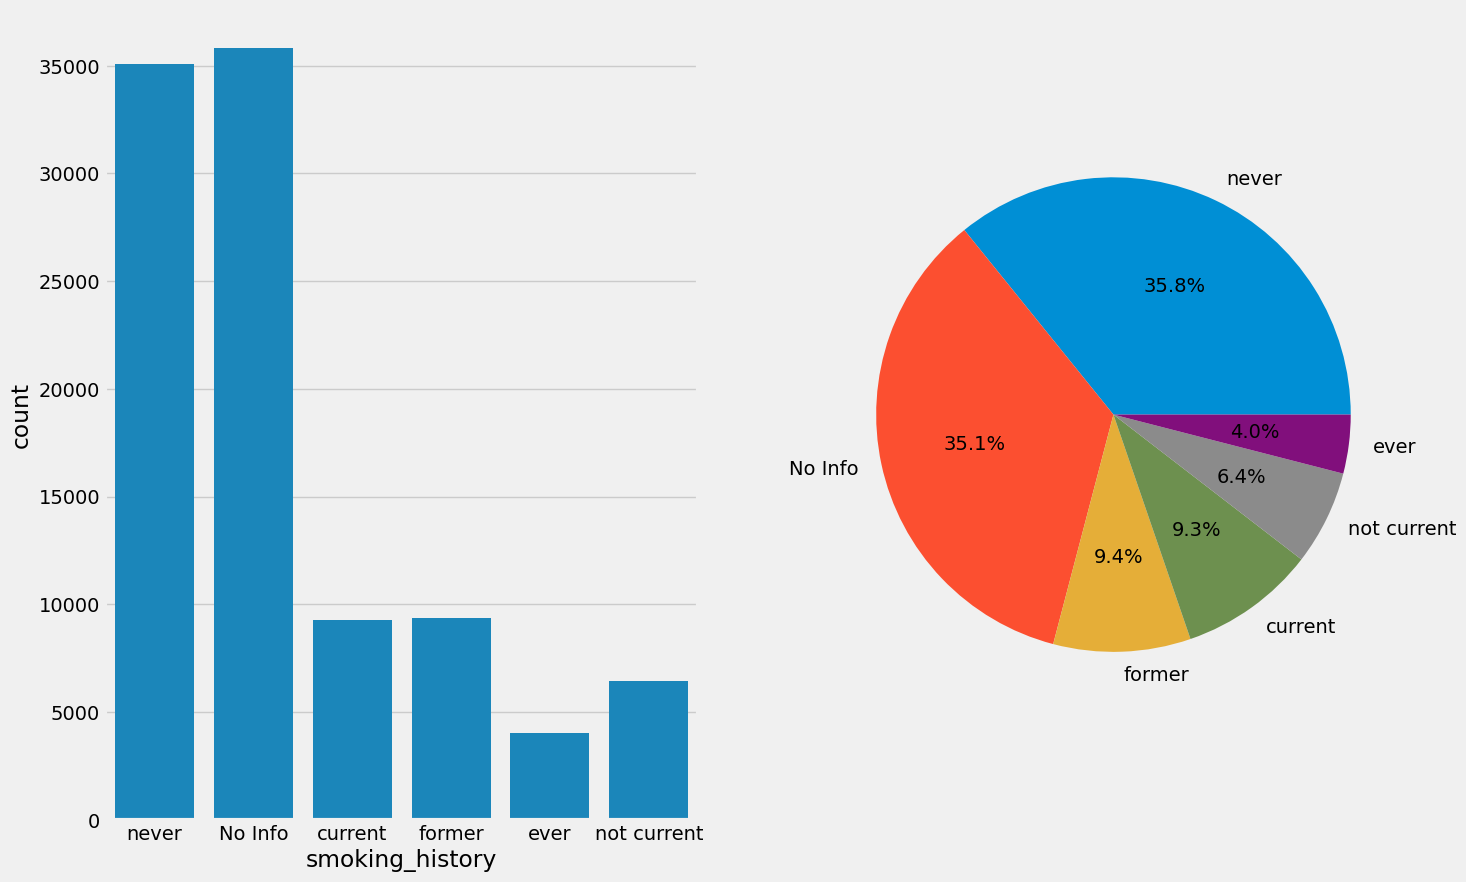

In [9]:
labels = ['never', 'No Info', 'former', 'current', 'not current', 'ever']
values = data['smoking_history'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(x=data['smoking_history'], data=data)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.savefig('Image')
plt.show()

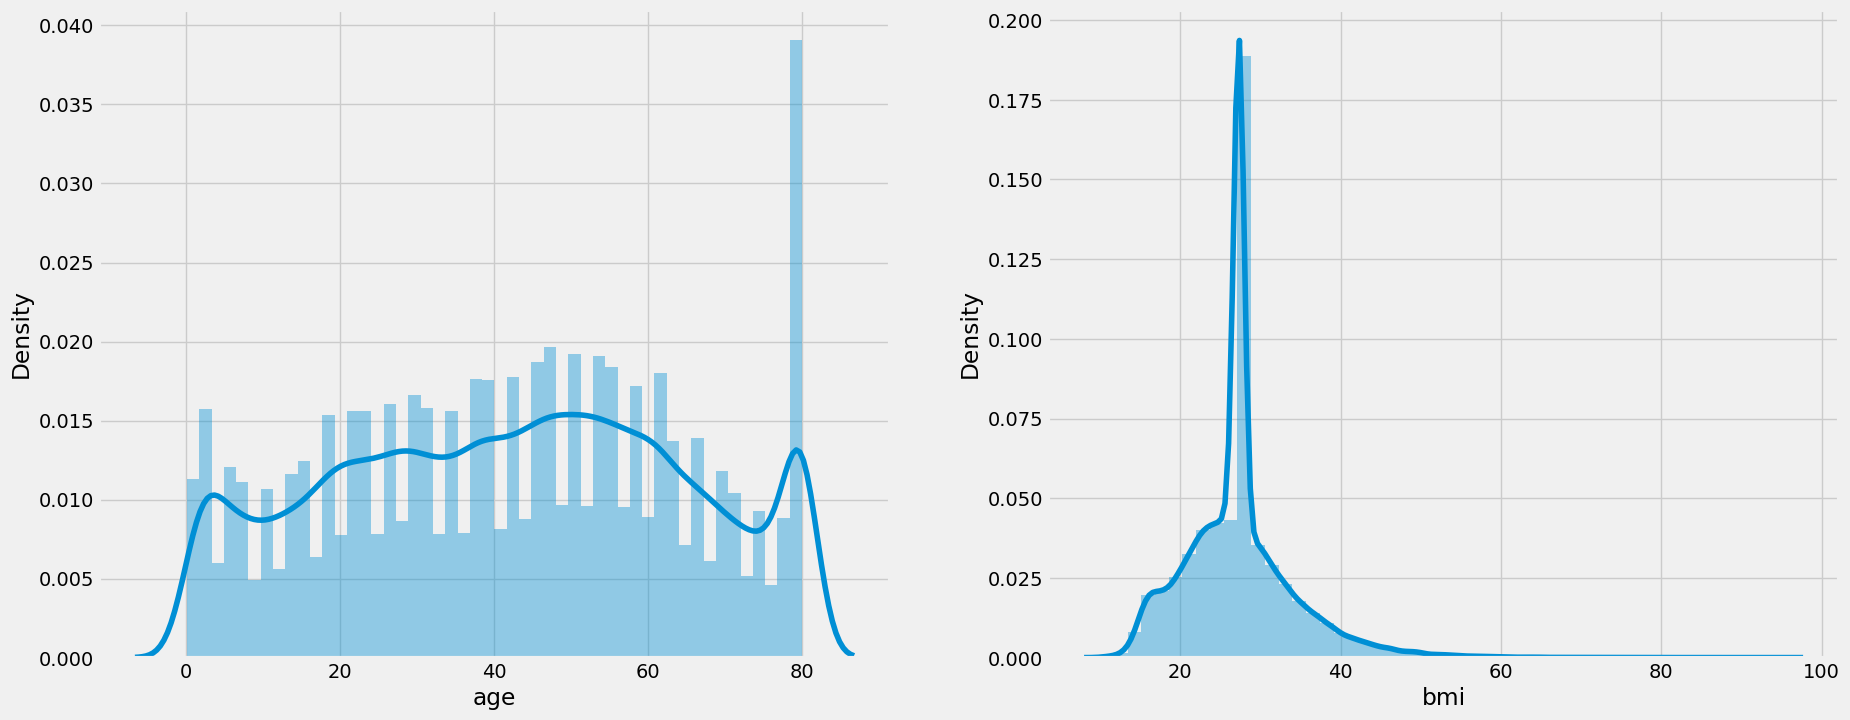

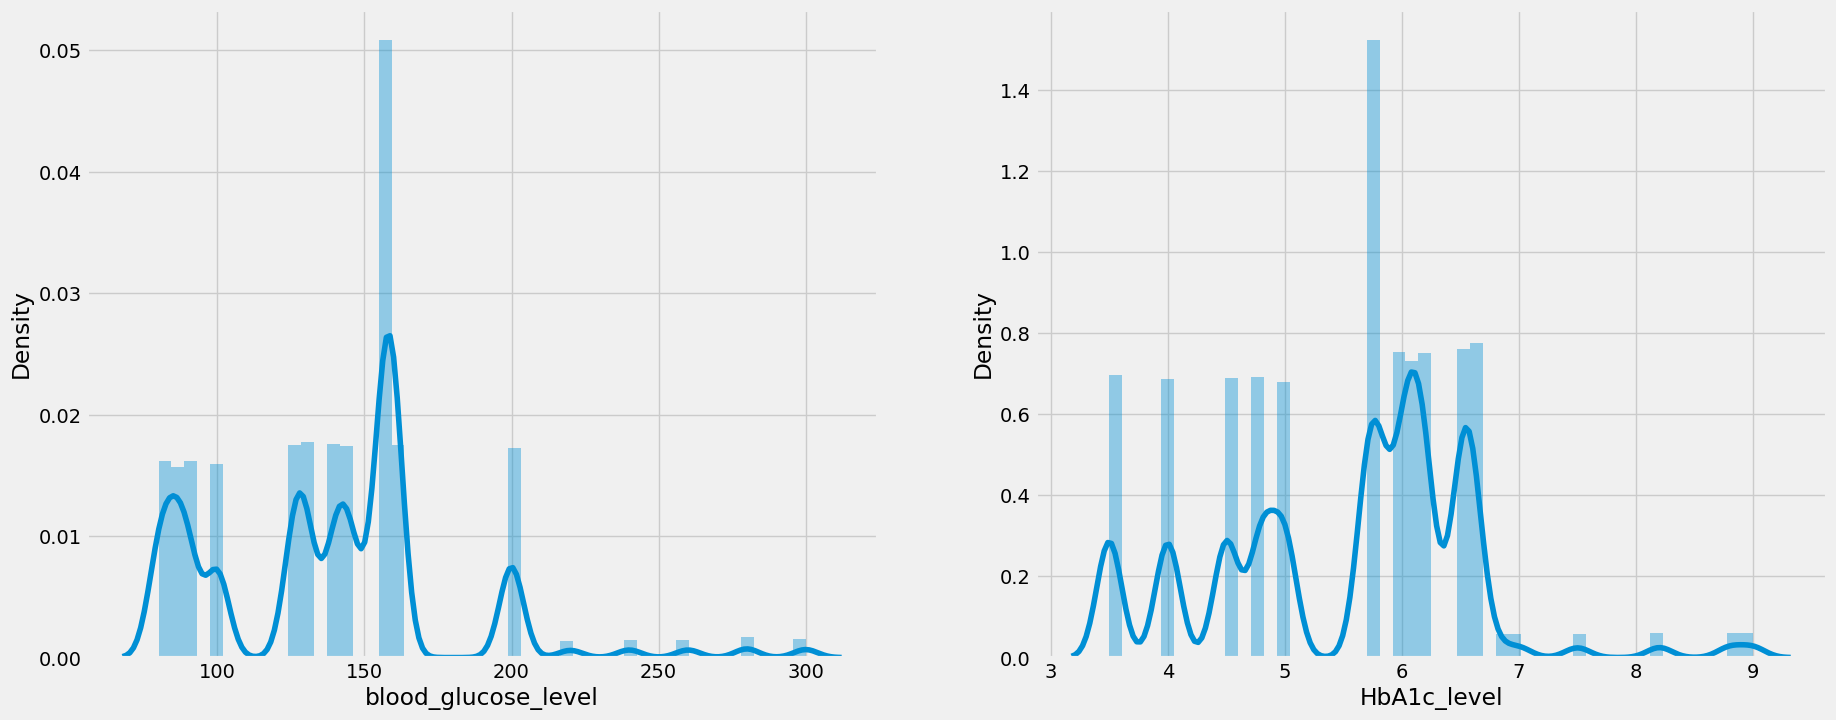

<Figure size 640x480 with 0 Axes>

In [10]:
numerical = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']
i = 0

while i < 4:
  plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)
  sns.distplot(data[numerical[i]])
  i += 1
  if i == 4:
    break
  plt.subplot(1, 2, 2)
  sns.distplot(data[numerical[i]])
  i += 1
  plt.show()

plt.savefig('2')

# **Data Preprocessing**

In [11]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [12]:
data.duplicated().sum()

3854

In [13]:
data = data.drop_duplicates()

In [14]:
data.duplicated().sum()

0

In [15]:
test = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
z = np.abs(stats.zscore(test))
data = data[(z < 3).all(axis=1)]

In [16]:
data.shape

(92542, 9)

In [17]:
data['smoking_history'].replace({'never': 2, 'No Info': 3, 'current': 4, 'former': 5,
                                'not current': 6, 'ever': 7}, inplace=True)

In [18]:
data['gender'].replace({'Male': 2, 'Female': 3, 'Other': 3}, inplace=True)

In [19]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,3,80.0,0,1,2,25.19,6.6,140,0
1,3,54.0,0,0,3,27.32,6.6,80,0
2,2,28.0,0,0,2,27.32,5.7,158,0
3,3,36.0,0,0,4,23.45,5.0,155,0
4,2,76.0,1,1,4,20.14,4.8,155,0


# **Exploring Categorical Features**

In [20]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

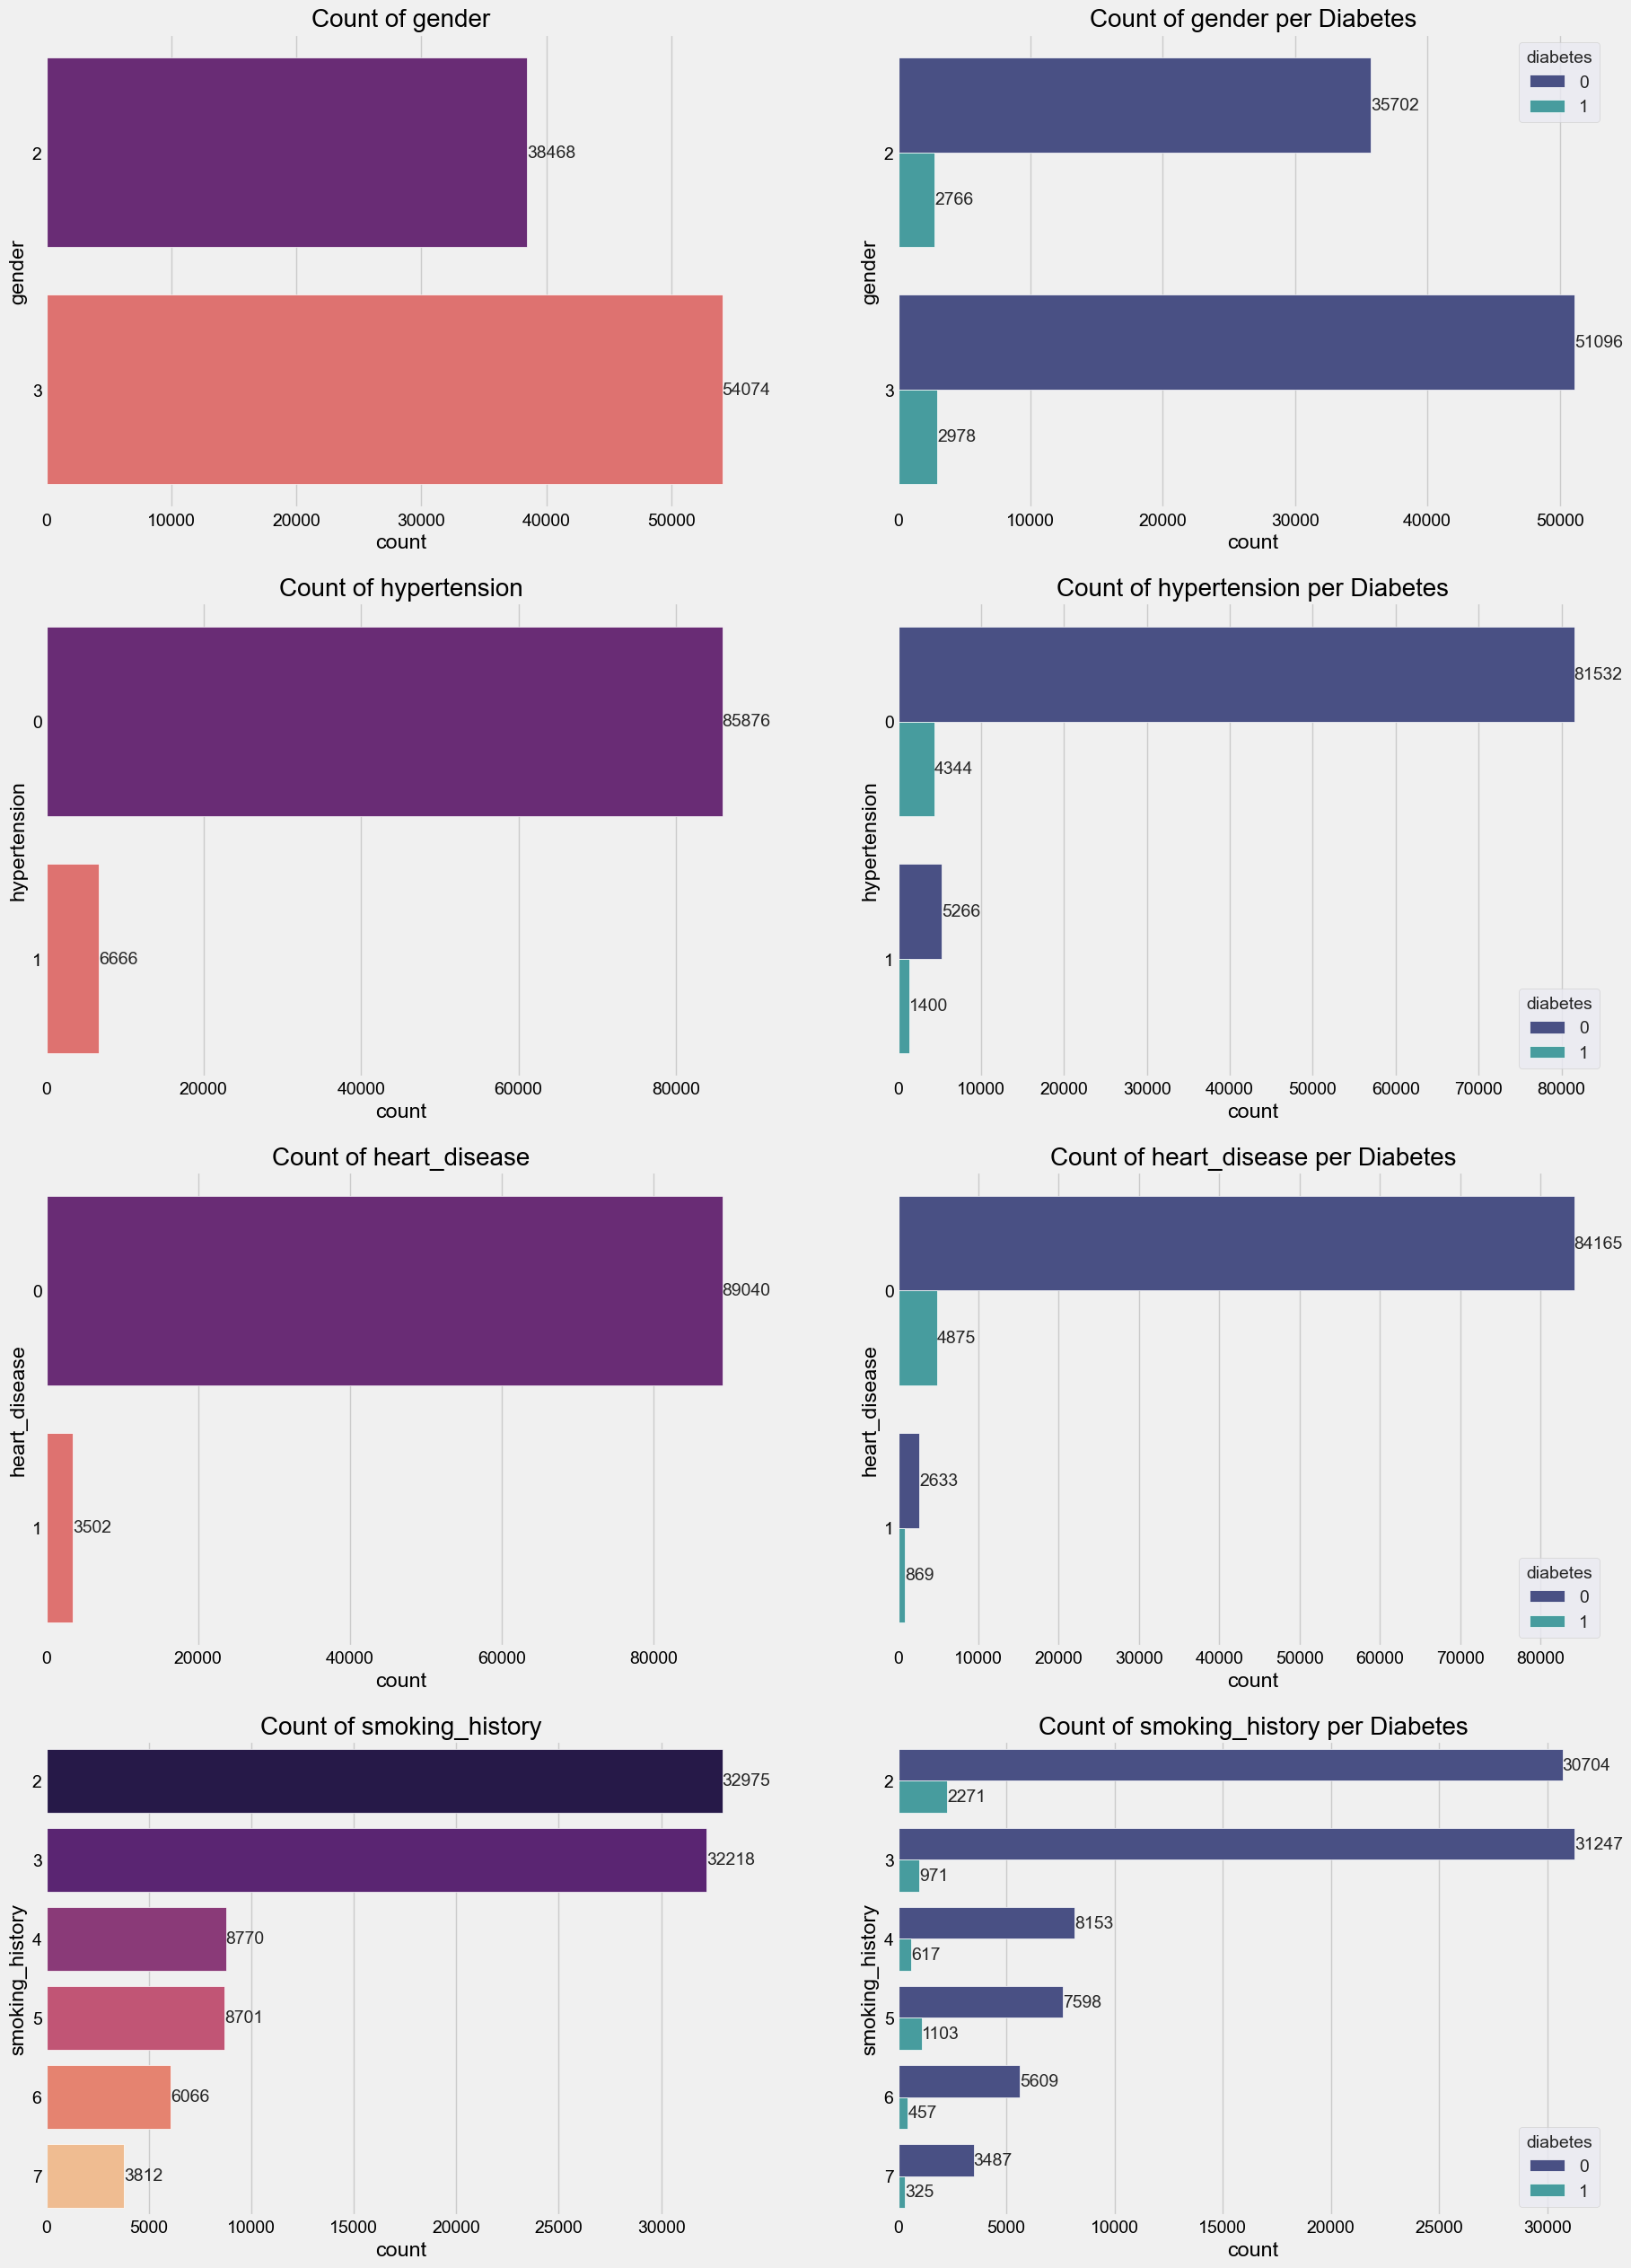

In [21]:
fig, axes = plt.subplots(4,2, figsize=(20,30))
sns.set_style('darkgrid')
idx = 0
for col in categorical_columns:
    sns.countplot(data=data, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='20')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=data, y=col, palette='mako', orient='h',  hue='diabetes',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Diabetes', fontsize='20')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

# **Exploring Numerical Features**

In [22]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

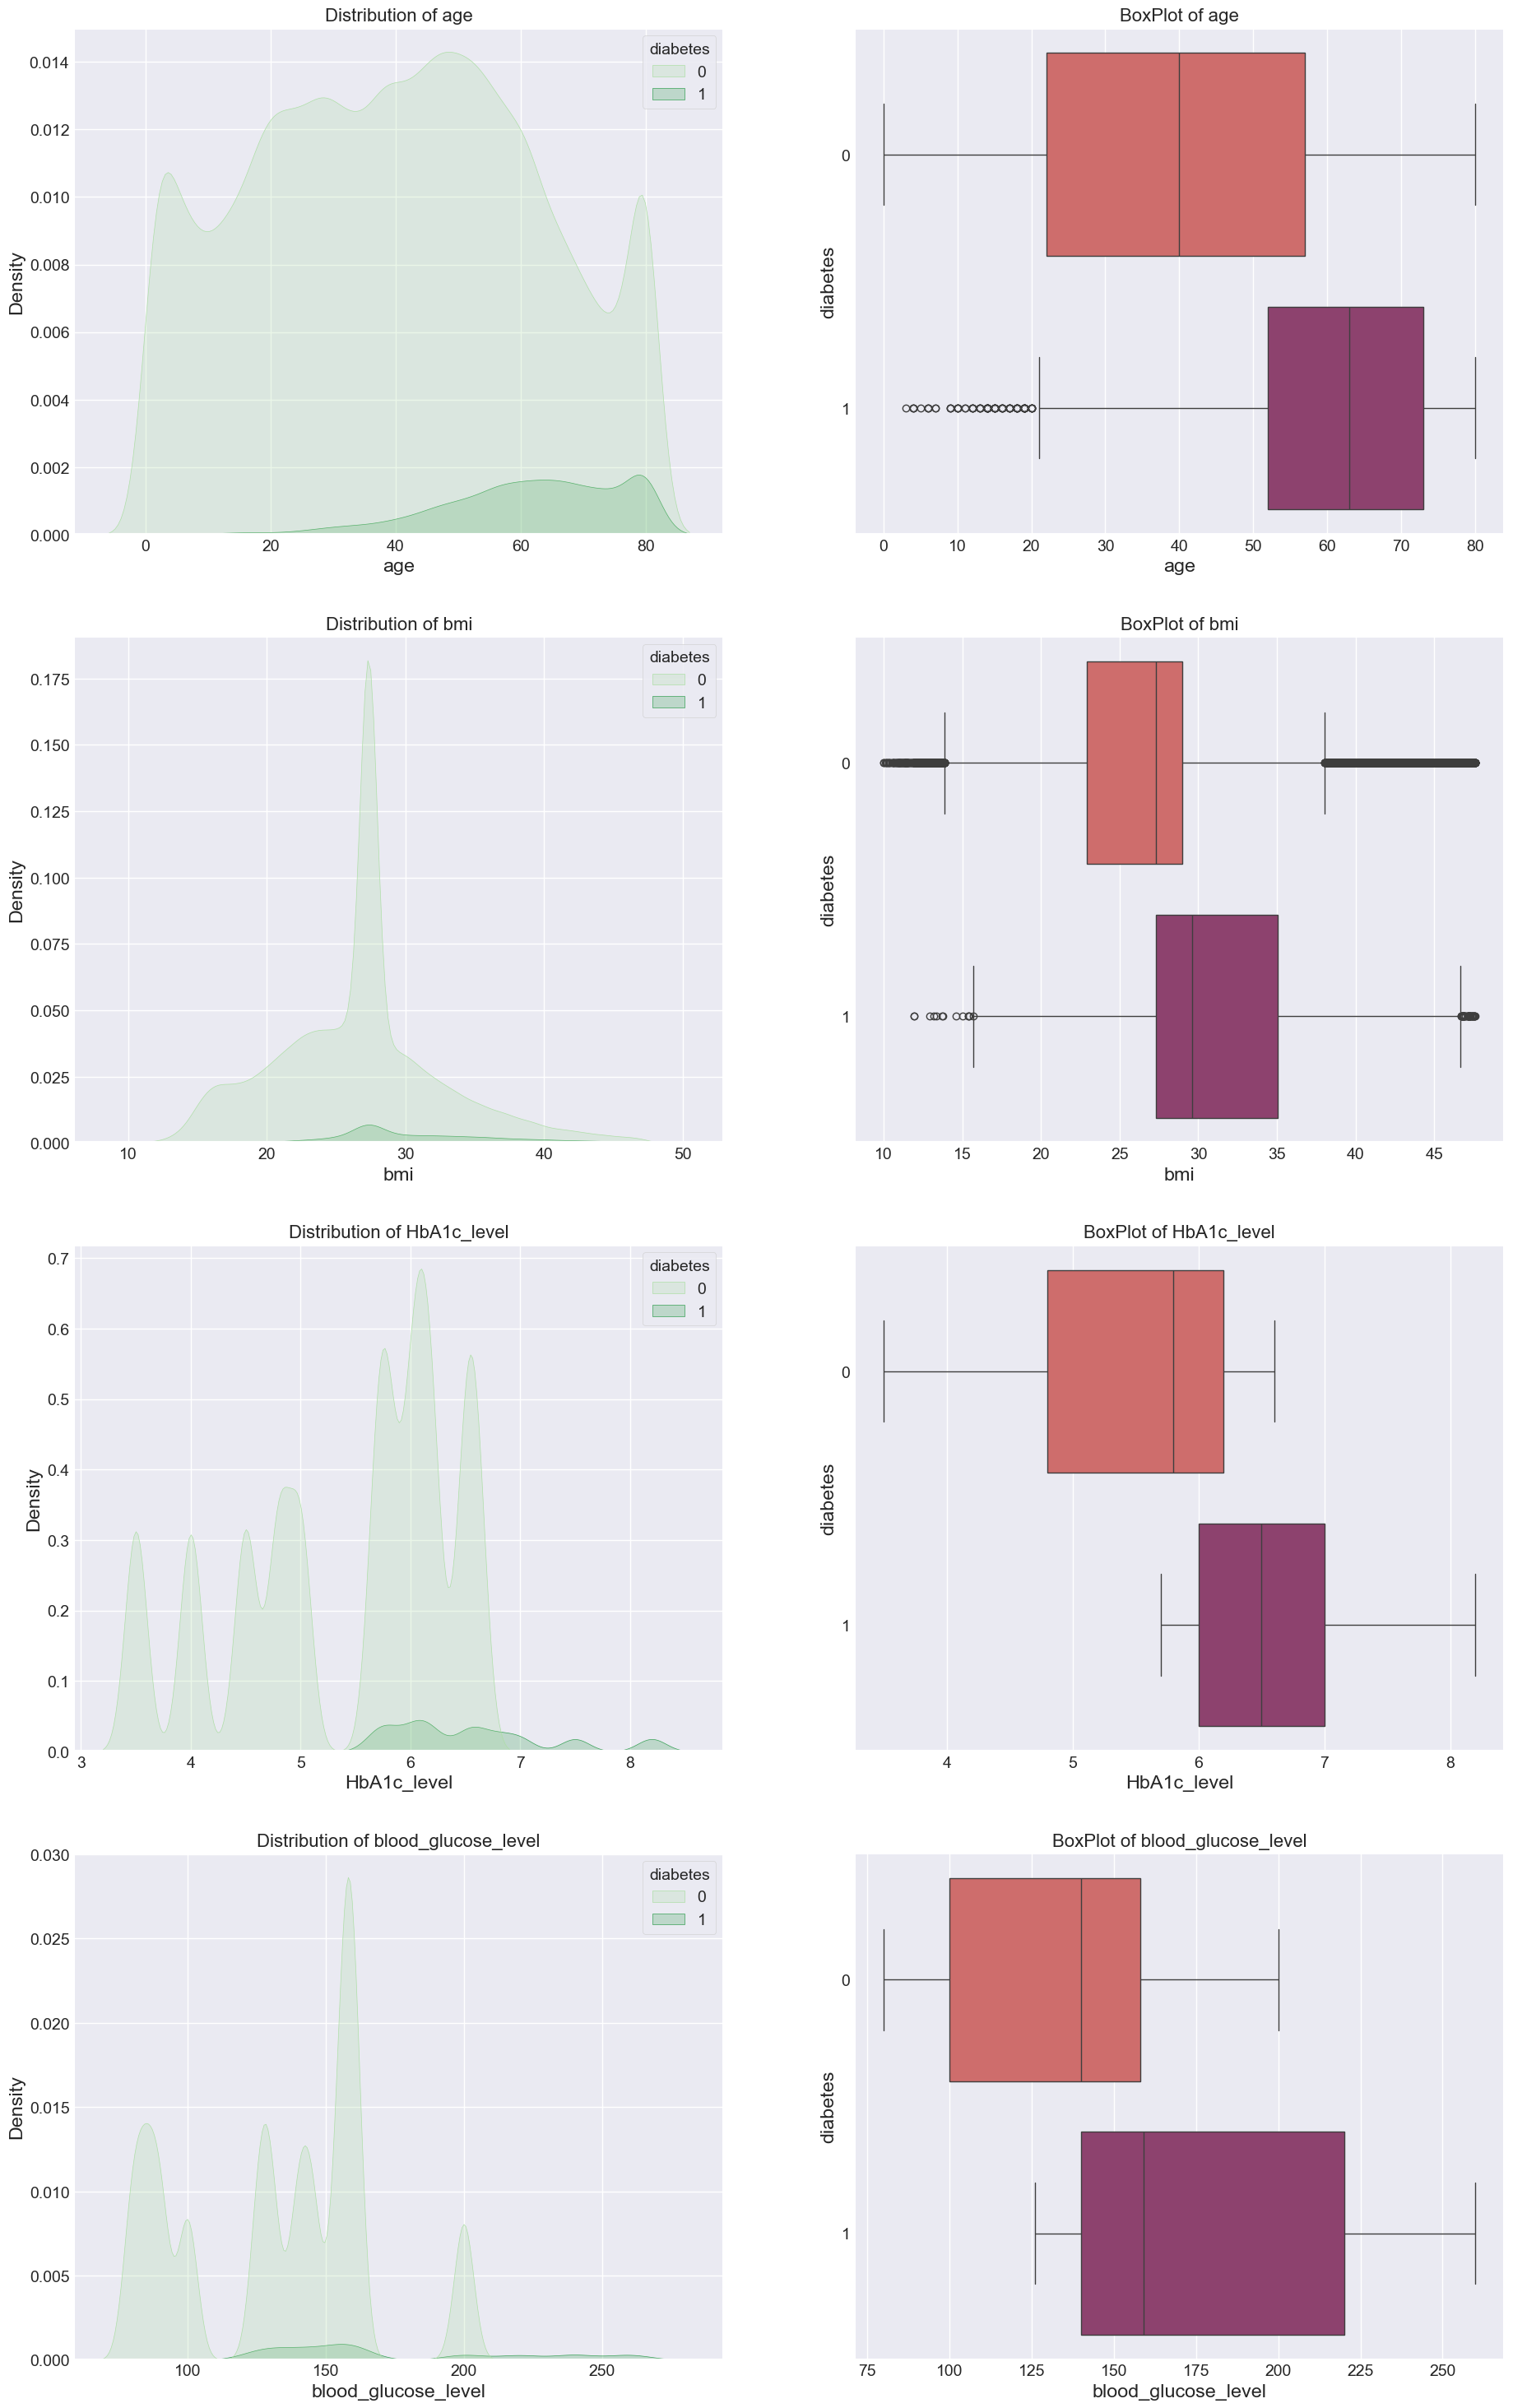

In [23]:
fig, axes = plt.subplots(4,2, figsize=(20,35))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_columns):
    sns.kdeplot(data=data, x=col, palette='Greens',fill=True , hue='diabetes',
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=data, x=col, palette='flare' , y='diabetes', orient='h',
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

# **Correlation Between The Features**

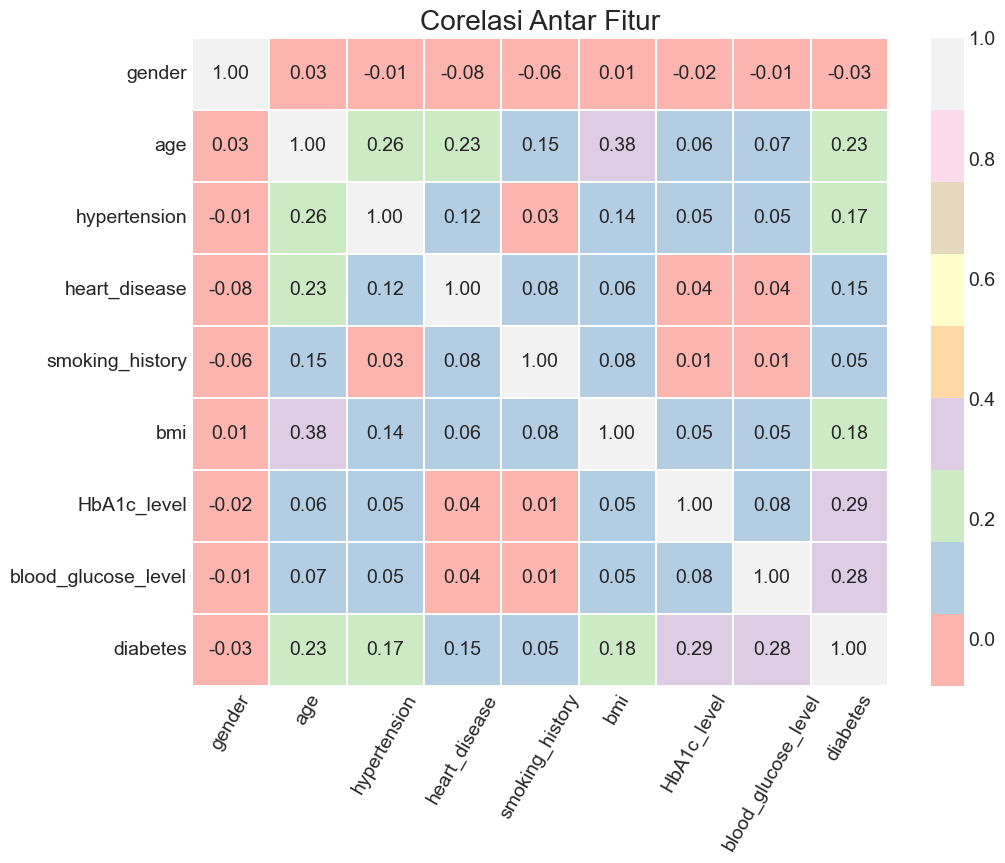

In [24]:
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Corelasi Antar Fitur')
a = sns.heatmap(data.corr(), annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=60)
a.set_yticklabels(a.get_yticklabels())
plt.show()

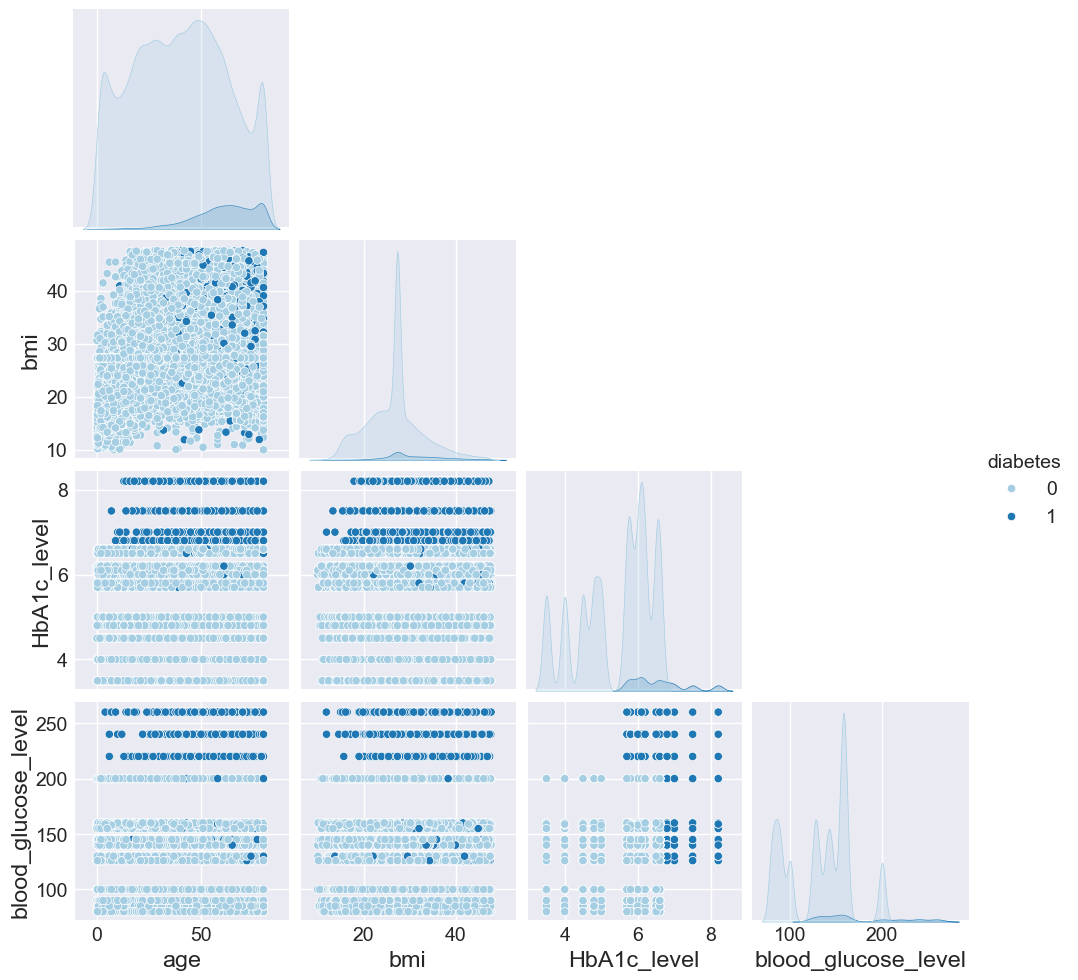

In [25]:
sns.set_palette(sns.color_palette("Paired", 8))
sns.pairplot(data, x_vars=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], y_vars=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], hue='diabetes',corner=True)
plt.show()

# **Split Data**

In [26]:
target = data['diabetes']
data.drop('diabetes', axis=1, inplace=True)

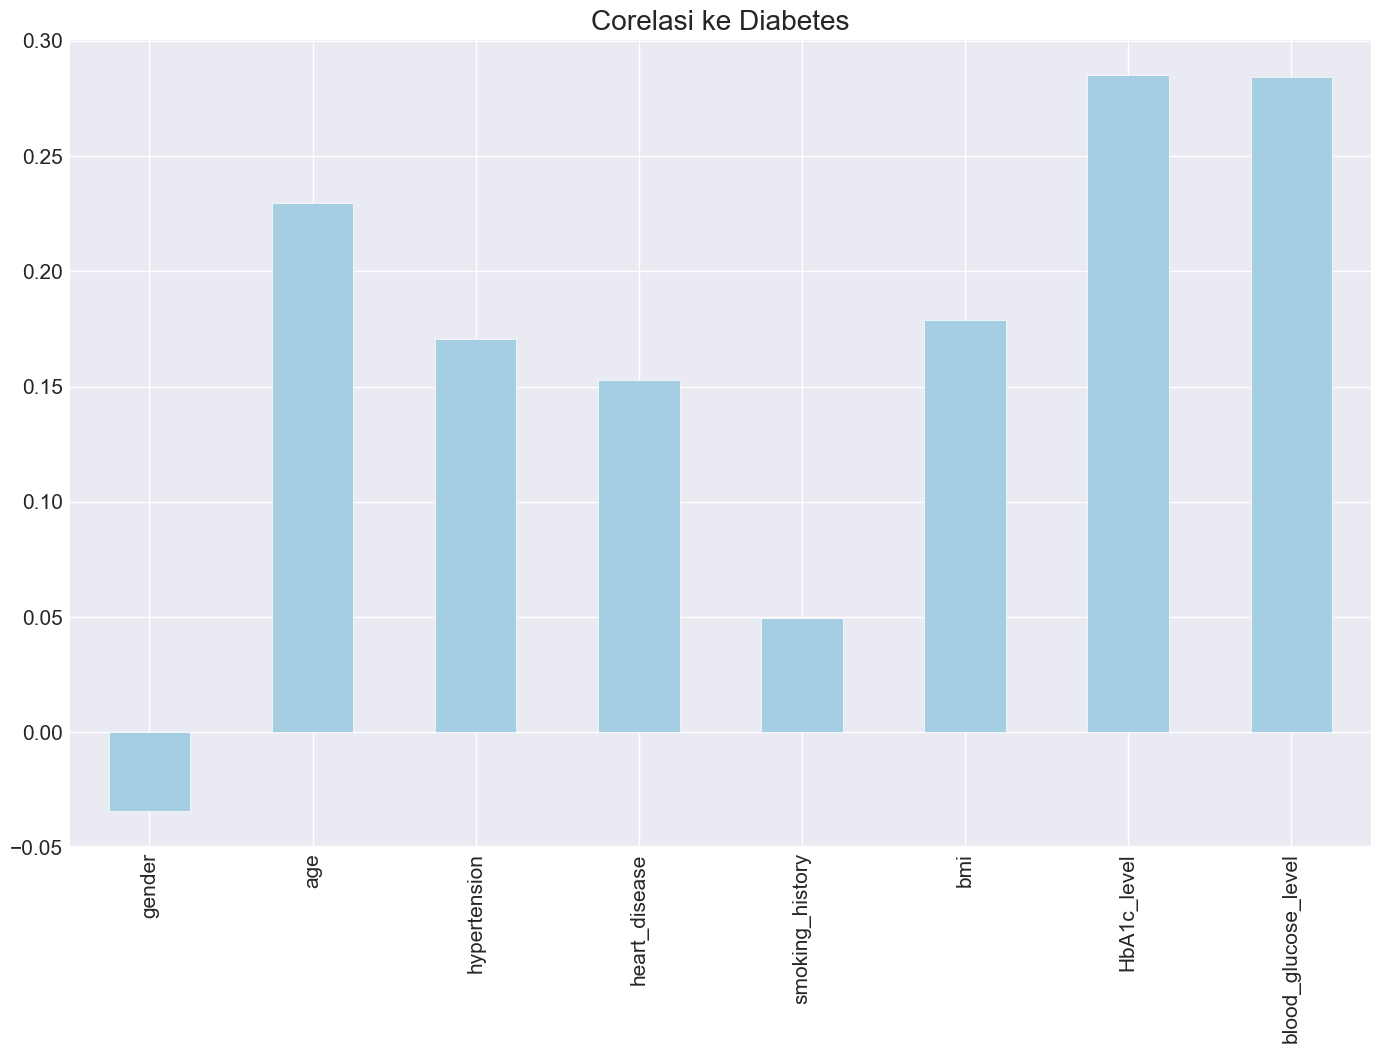

In [27]:
data.corrwith(target).plot.bar(
    figsize=(15, 10), title='Corelasi ke Diabetes',
    fontsize=15, rot=90, grid=True)
plt.savefig('5')
plt.show()

# **Train Test Split**

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.35, random_state=42)

In [29]:
def metrics_calculator(y_test, y_pred, model_name):
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

# **Feature Scaling Using StandardScaler**

In [30]:
import joblib

cols = xtrain.columns

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

xtrain = pd.DataFrame(xtrain, columns=[cols])
xtest = pd.DataFrame(xtest, columns=[cols])

# **Model Training using DecisionTree**

In [31]:
tree = DecisionTreeClassifier()

param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(1, 10)]}

gridSearch = GridSearchCV(tree, param, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error')

In [32]:
Tree = gridSearch.best_estimator_
Tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=2)

In [33]:
ypred = Tree.predict(xtest)

In [34]:
kf = StratifiedKFold(n_splits=10, shuffle=False)

In [35]:
score = cross_val_score(Tree, xtrain, ytrain, cv=kf, scoring='accuracy')
tree_model_cv_score = score.mean()
tree_model_cv_stdev = stdev(score)
print('Skor Akurasi Validasi K-cross adalah: ')
for s in score:
    print(s)

Skor Akurasi Validasi K-cross adalah: 
0.9715757978723404
0.9717420212765957
0.971571072319202
0.9687448046550291
0.972568578553616
0.97024106400665
0.9732335827098919
0.9677472984206151
0.970739817123857
0.9697423108894431


In [36]:
accuracy = ['Akurasi Validasi K-cross']
random_a = pd.DataFrame({'Rata-rata CV':tree_model_cv_score,'Standar Deviasi':tree_model_cv_stdev},index=accuracy)
random_a

,Rata-rata CV,Standar Deviasi
Akurasi Validasi K-cross,0.970791,0.001703


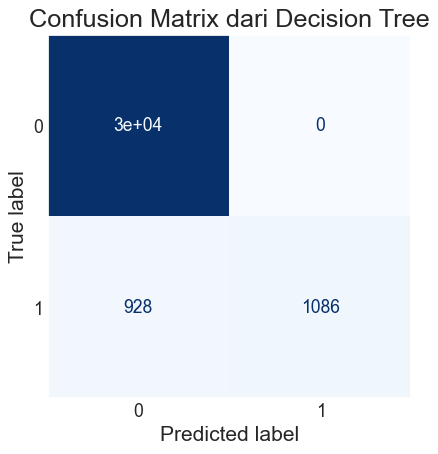

In [37]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(Tree, xtest, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix dari Decision Tree')
plt.grid()

In [38]:
tree_result = metrics_calculator(ytest, ypred, 'Decision Tree')
tree_result

,Decision Tree
Accuracy,0.971349
Precision,0.985178
Recall,0.769613
F1-score,0.842800


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

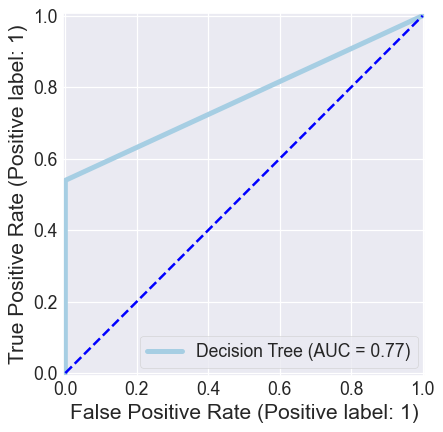

In [39]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
RocCurveDisplay.from_estimator(Tree, xtest, ytest, ax=ax, name='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2, c='blue')

sns.set_style('darkgrid')

plt.show()

# **Conclusion**

In [40]:
Conclusion = pd.concat([tree_result], axis=1)
Conclusion

,Decision Tree
Accuracy,0.971349
Precision,0.985178
Recall,0.769613
F1-score,0.842800


**Feature Importances**

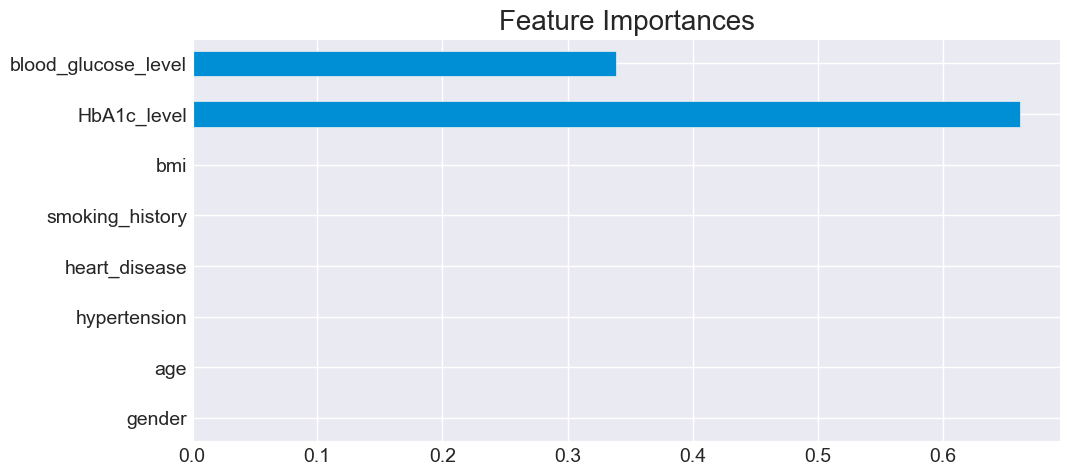

In [41]:
plt.figure(figsize=(10, 5))
plt.title('Feature Importances', size=20)

plt.style.use('fivethirtyeight')
pd.Series(Tree.feature_importances_, index=data.columns).plot(kind='barh')
plt.show()

**Save Model**

In [42]:
# Simpan scaler dan model ke dalam satu file
model_scaler = {
    'model': tree,
    'scaler': scaler
}
joblib.dump(model_scaler, 'model_scaler.pkl')

['model_scaler.pkl']

In [43]:
model_scaler = joblib.load('model_scaler.pkl')
model = model_scaler['model']
scaler = model_scaler['scaler']

In [53]:
!zip mymodel.zip model_scaler.pkl

In [44]:
model = joblib.load('prediksi_diabetes_model.pkl')

### testing`

In [45]:
input_data_1 = (3,42.0,0,0,2,21,10,75)
input_data_2 = (2,50.0,0,0,5,37.16,9.0,159)
input_data_3 = (2,50.0,0,0,5,37.16,6,120)

input_data_1 = np.asarray(input_data_1).reshape(1, -1)
input_data_2 = np.asarray(input_data_2).reshape(1, -1)
input_data_3 = np.asarray(input_data_3).reshape(1, -1)

In [46]:
new_input_1 = scaler.transform(input_data_1)
new_input_2 = scaler.transform(input_data_2)
new_input_3 = scaler.transform(input_data_3)

In [47]:
prediction_1 = model.predict(new_input_1)
prediction_2 = model.predict(new_input_2)
prediction_3 = model.predict(new_input_3)

In [48]:
print(prediction_1[0])
if prediction_1[0] == 0:
      print('Tidak menderita diabetes')
else:
      print('Menderita diabetes')

1
Menderita diabetes


In [49]:
print(prediction_2[0])
if prediction_2[0] == 0:
      print('Tidak menderita diabetes')
else:
      print('Menderita diabetes')

1
Menderita diabetes


In [50]:
print(prediction_3[0])
if prediction_3[0] == 0:
      print('Tidak menderita diabetes')
else:
      print('Menderita diabetes')

0
Tidak menderita diabetes
